# Part 1

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

Image loaded successfully!


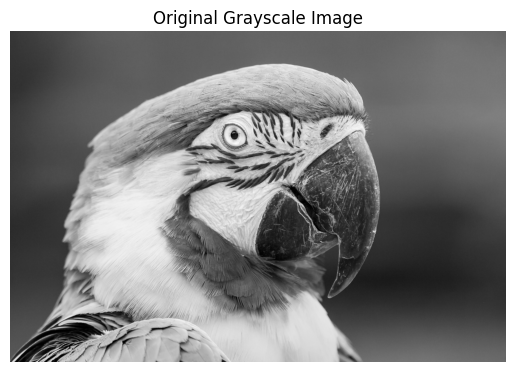

In [44]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(
    r"D:\MIT WPU B.Tech Data\3nd Year Data\IPPR\Image-Processing-and-Pattern-Recognition\Experiment_03_Image_Smoothing_And_Sharpining_Filter\pexels-jean-van-der-meulen-1526403.jpg",
    cv2.IMREAD_GRAYSCALE
)

if img is None:
    print("Image not found or path is incorrect!")
else:
    print("Image loaded successfully!")
    plt.imshow(img, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")


###  Gaussian noise

(np.float64(-0.5), np.float64(2930.5), np.float64(1953.5), np.float64(-0.5))

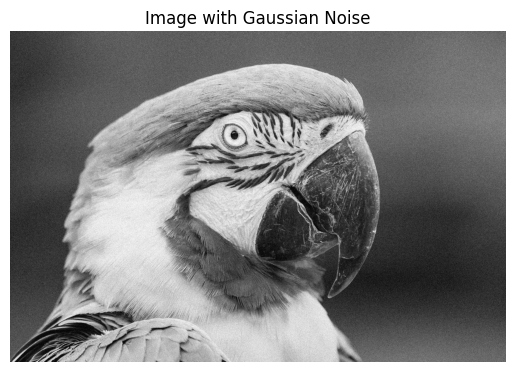

In [45]:
mean = 0
std = 25

gaussian_noise = np.random.normal(mean, std, img.shape)
noisy_img = img.astype(np.float32) + gaussian_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# Display noisy image
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis("off")

### Add Salt & Pepper Noise

(np.float64(-0.5), np.float64(2930.5), np.float64(1953.5), np.float64(-0.5))

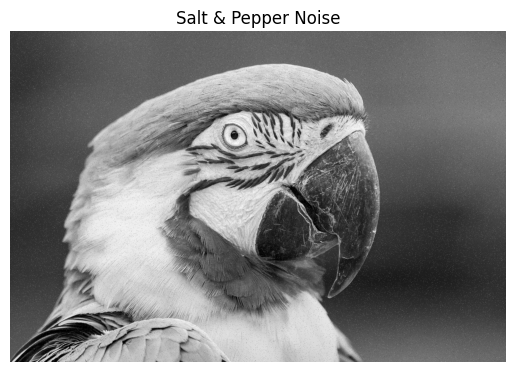

In [46]:
salt_pepper_noisy = img.copy()
prob = 0.02

rand = np.random.rand(*img.shape)

salt_pepper_noisy[rand < prob/2] = 0
salt_pepper_noisy[rand > 1 - prob/2] = 255

plt.imshow(salt_pepper_noisy, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

### Add Uniform Noise

(np.float64(-0.5), np.float64(2930.5), np.float64(1953.5), np.float64(-0.5))

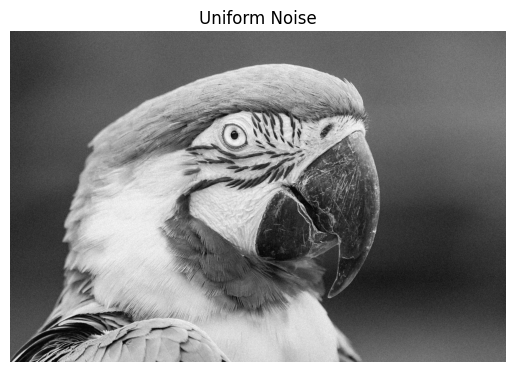

In [47]:
low = -30
high = 30

uniform_noise = np.random.uniform(low, high, img.shape)
uniform_noisy = img + uniform_noise

uniform_noisy = np.clip(uniform_noisy, 0, 255).astype(np.uint8)

plt.imshow(uniform_noisy, cmap='gray')
plt.title("Uniform Noise")
plt.axis("off")

(np.float64(-0.5), np.float64(2930.5), np.float64(1953.5), np.float64(-0.5))

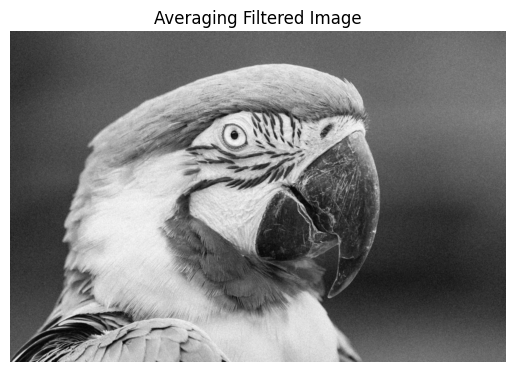

In [48]:
import cv2

kernel_size = 5
avg_filtered_img = cv2.blur(noisy_img, (kernel_size, kernel_size))
import matplotlib.pyplot as plt

plt.imshow(avg_filtered_img, cmap='gray')
plt.title("Averaging Filtered Image")
plt.axis("off")


### Apply avg filter

In [49]:
kernel_size = 5

gaussian_avg = cv2.blur(gaussian_noise, (kernel_size, kernel_size))
salt_pepper_avg = cv2.blur(salt_pepper_noisy, (kernel_size, kernel_size))
uniform_avg = cv2.blur(uniform_noisy, (kernel_size, kernel_size))


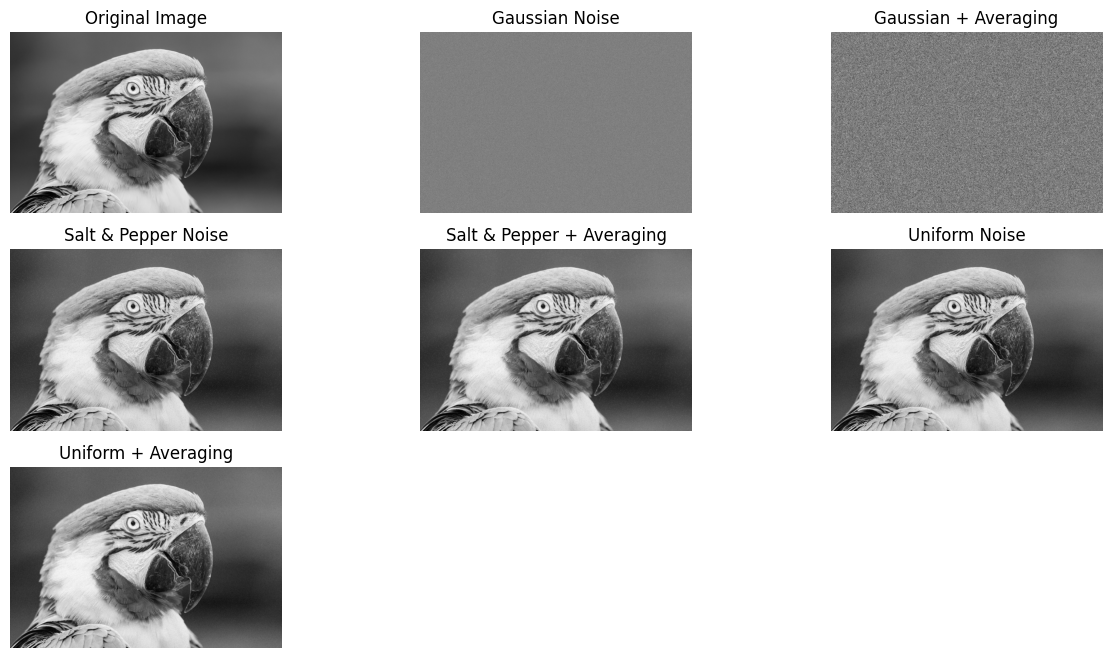

In [50]:
plt.figure(figsize=(15,8))

plt.subplot(3,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(3,3,2)
plt.imshow(gaussian_noise, cmap='gray')
plt.title("Gaussian Noise")
plt.axis("off")

plt.subplot(3,3,3)
plt.imshow(gaussian_avg, cmap='gray')
plt.title("Gaussian + Averaging")
plt.axis("off")

plt.subplot(3,3,4)
plt.imshow(salt_pepper_noisy, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis("off")

plt.subplot(3,3,5)
plt.imshow(salt_pepper_avg, cmap='gray')
plt.title("Salt & Pepper + Averaging")
plt.axis("off")

plt.subplot(3,3,6)
plt.imshow(uniform_noisy, cmap='gray')
plt.title("Uniform Noise")
plt.axis("off")

plt.subplot(3,3,7)
plt.imshow(uniform_avg, cmap='gray')
plt.title("Uniform + Averaging")
plt.axis("off")

plt.show()


### Compare Median Filtered Image with Averaging Filtered Image

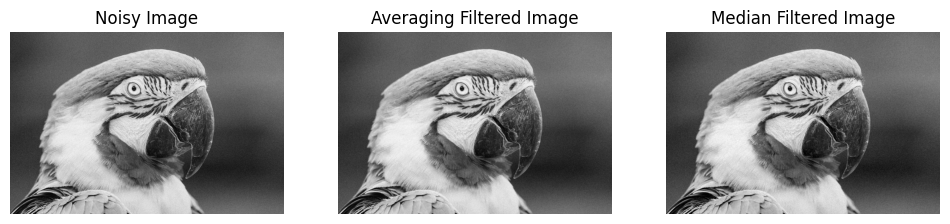

In [51]:

median_filtered_img = cv2.medianBlur(noisy_img, 5)


plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(avg_filtered_img, cmap='gray')
plt.title("Averaging Filtered Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(median_filtered_img, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")

plt.show()


###  Masking

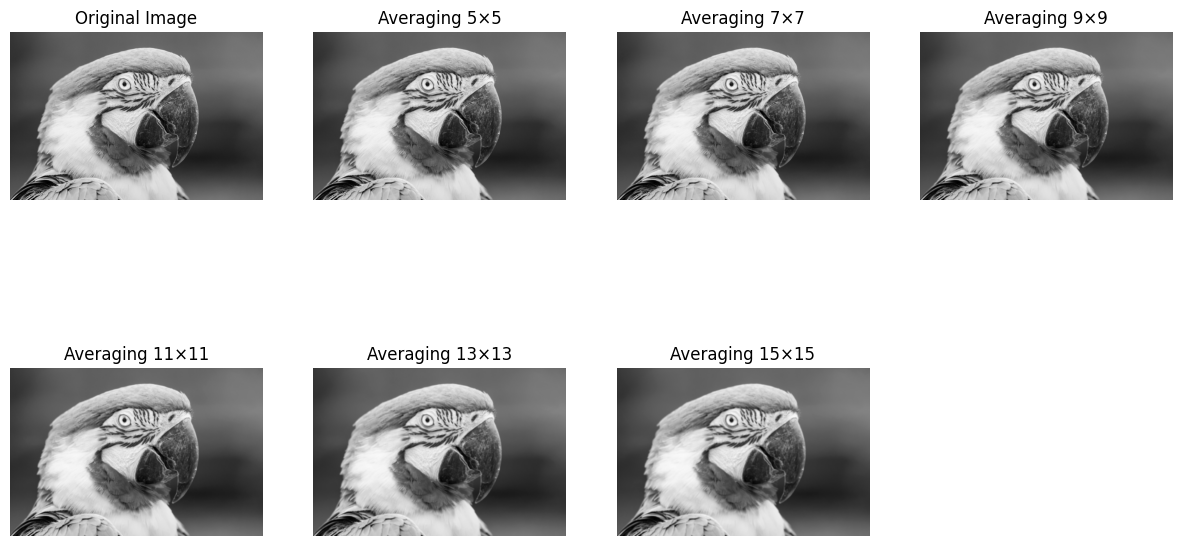

In [52]:
mask_sizes = [5, 7, 9, 11, 13, 15]

plt.figure(figsize=(15,8))


plt.subplot(2,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

for i, k in enumerate(mask_sizes):
    smoothed = cv2.blur(img, (k, k))
    
    plt.subplot(2,4,i+2)
    plt.imshow(smoothed, cmap='gray')
    plt.title(f"Averaging {k}×{k}")
    plt.axis("off")

plt.show()


### Apply Nonlinear Filters (Median, Min, Max)

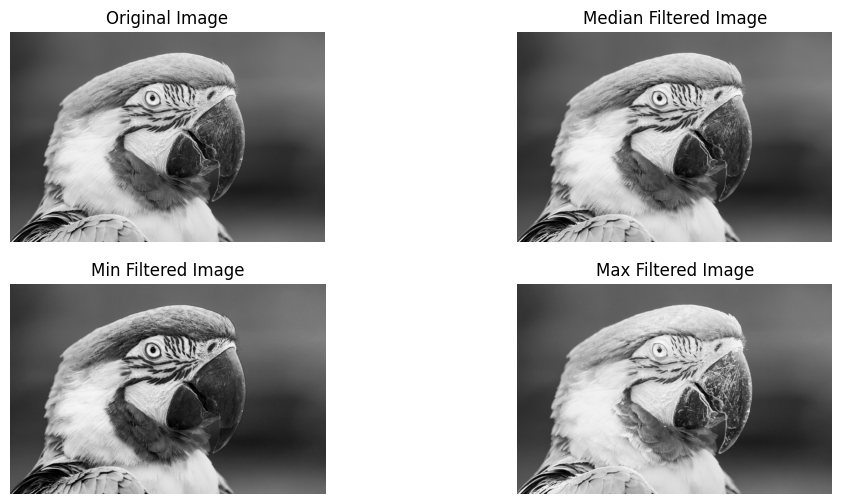

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


k = 5


median_img = cv2.medianBlur(img, k)


kernel = np.ones((k, k), np.uint8)
min_img = cv2.erode(img, kernel)


max_img = cv2.dilate(img, kernel)
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(median_img, cmap='gray')
plt.title("Median Filtered Image")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(min_img, cmap='gray')
plt.title("Min Filtered Image")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(max_img, cmap='gray')
plt.title("Max Filtered Image")
plt.axis("off")

plt.show()



In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


mean = 0
std = 25
gaussian_noise = np.random.normal(mean, std, img.shape)
gaussian_noisy = img.astype(np.float32) + gaussian_noise
gaussian_noisy = np.clip(gaussian_noisy, 0, 255).astype(np.uint8)


salt_pepper_noisy = img.copy()
prob = 0.02
rand = np.random.rand(*img.shape)
salt_pepper_noisy[rand < prob/2] = 0
salt_pepper_noisy[rand > 1 - prob/2] = 255


uniform_noise = np.random.uniform(-30, 30, img.shape)
uniform_noisy = img.astype(np.float32) + uniform_noise
uniform_noisy = np.clip(uniform_noisy, 0, 255).astype(np.uint8)


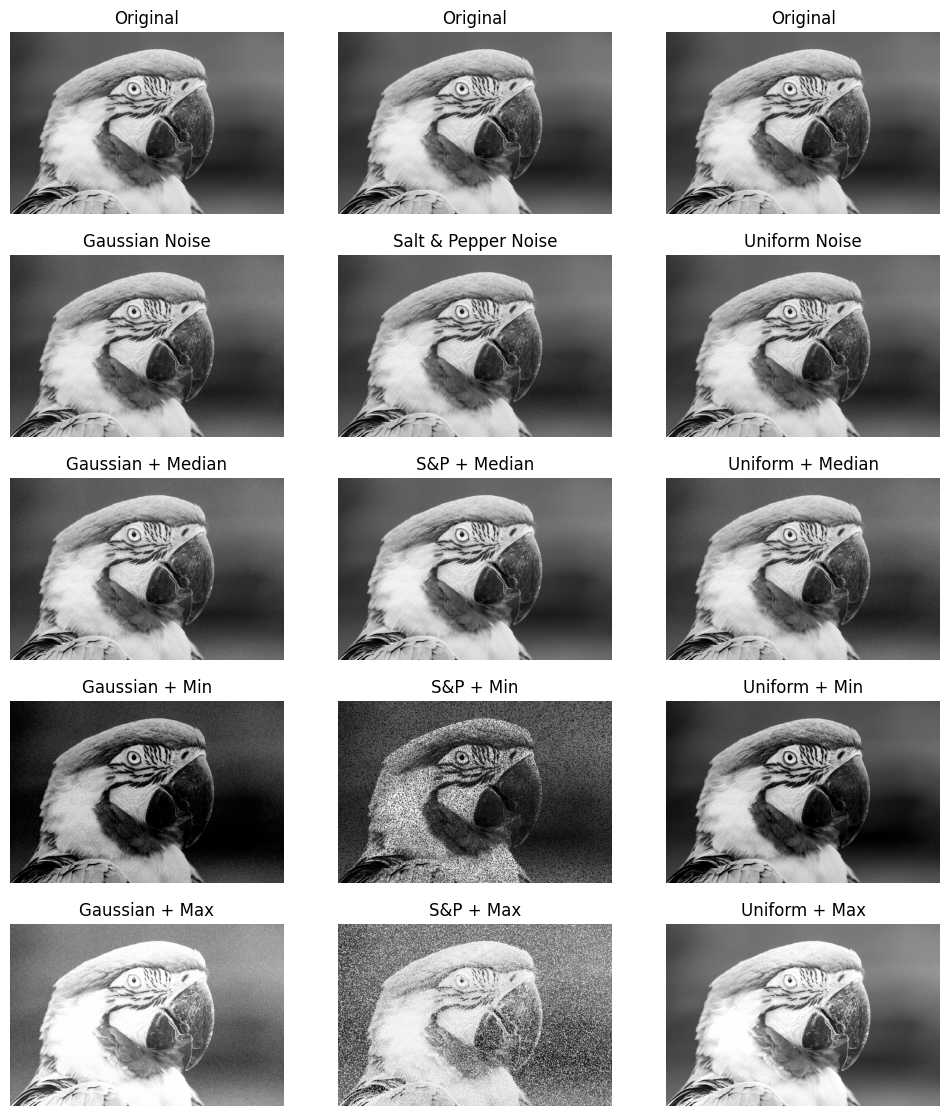

In [56]:

k = 5
kernel = np.ones((k, k), np.uint8)


gaussian_median = cv2.medianBlur(gaussian_noisy, k)
salt_pepper_median = cv2.medianBlur(salt_pepper_noisy, k)
uniform_median = cv2.medianBlur(uniform_noisy, k)


gaussian_min = cv2.erode(gaussian_noisy, kernel)
salt_pepper_min = cv2.erode(salt_pepper_noisy, kernel)
uniform_min = cv2.erode(uniform_noisy, kernel)


gaussian_max = cv2.dilate(gaussian_noisy, kernel)
salt_pepper_max = cv2.dilate(salt_pepper_noisy, kernel)
uniform_max = cv2.dilate(uniform_noisy, kernel)

plt.figure(figsize=(12,14))


plt.subplot(5,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(5,3,2); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(5,3,3); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")


plt.subplot(5,3,4); plt.imshow(gaussian_noisy, cmap='gray'); plt.title("Gaussian Noise"); plt.axis("off")
plt.subplot(5,3,5); plt.imshow(salt_pepper_noisy, cmap='gray'); plt.title("Salt & Pepper Noise"); plt.axis("off")
plt.subplot(5,3,6); plt.imshow(uniform_noisy, cmap='gray'); plt.title("Uniform Noise"); plt.axis("off")


plt.subplot(5,3,7); plt.imshow(gaussian_median, cmap='gray'); plt.title("Gaussian + Median"); plt.axis("off")
plt.subplot(5,3,8); plt.imshow(salt_pepper_median, cmap='gray'); plt.title("S&P + Median"); plt.axis("off")
plt.subplot(5,3,9); plt.imshow(uniform_median, cmap='gray'); plt.title("Uniform + Median"); plt.axis("off")

plt.subplot(5,3,10); plt.imshow(gaussian_min, cmap='gray'); plt.title("Gaussian + Min"); plt.axis("off")
plt.subplot(5,3,11); plt.imshow(salt_pepper_min, cmap='gray'); plt.title("S&P + Min"); plt.axis("off")
plt.subplot(5,3,12); plt.imshow(uniform_min, cmap='gray'); plt.title("Uniform + Min"); plt.axis("off")


plt.subplot(5,3,13); plt.imshow(gaussian_max, cmap='gray'); plt.title("Gaussian + Max"); plt.axis("off")
plt.subplot(5,3,14); plt.imshow(salt_pepper_max, cmap='gray'); plt.title("S&P + Max"); plt.axis("off")
plt.subplot(5,3,15); plt.imshow(uniform_max, cmap='gray'); plt.title("Uniform + Max"); plt.axis("off")

plt.show()


# Part 2

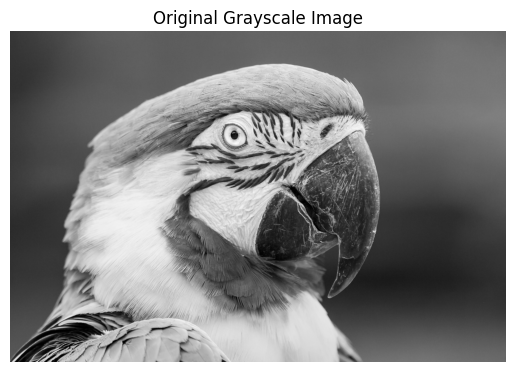

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(
    r"D:\MIT WPU B.Tech Data\3nd Year Data\IPPR\Image-Processing-and-Pattern-Recognition\Experiment_03_Image_Smoothing_And_Sharpining_Filter\pexels-jean-van-der-meulen-1526403.jpg",
    cv2.IMREAD_GRAYSCALE
)

if img is None:
    print("Image not found!")
else:
    plt.imshow(img, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")


### Apply Sharpening Filter on the Given Image

(np.float64(-0.5), np.float64(2930.5), np.float64(1953.5), np.float64(-0.5))

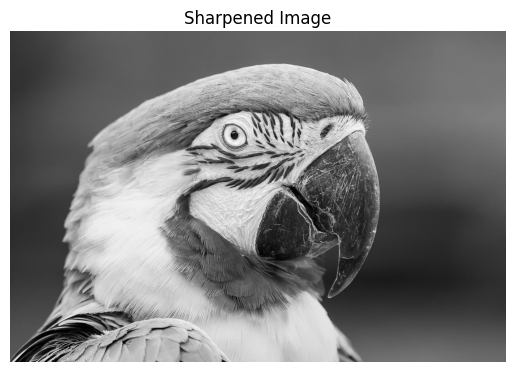

In [58]:
import numpy as np


sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])


sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)


plt.imshow(sharpened_img, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")


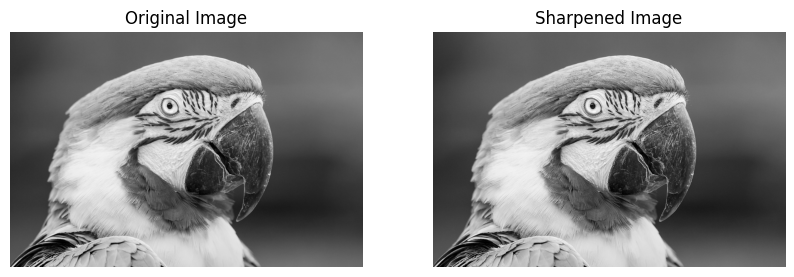

In [59]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened_img, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")

plt.show()


### Apply sharpening filter  on the noisy image. 

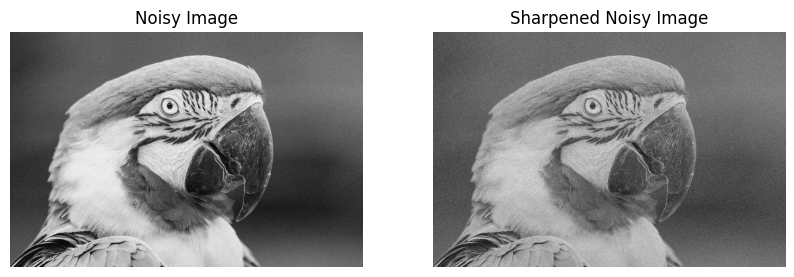

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
sharpened_noisy_img = cv2.filter2D(noisy_img, -1, sharpen_kernel)
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sharpened_noisy_img, cmap='gray')
plt.title("Sharpened Noisy Image")
plt.axis("off")

plt.show()



### Display original and sharpened images.  

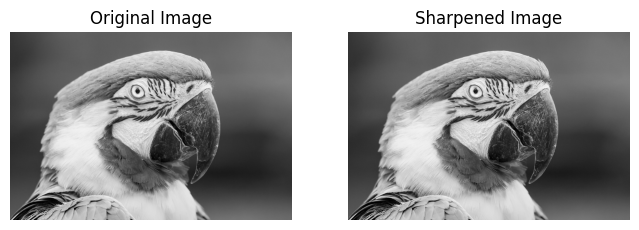

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))


plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")


plt.subplot(1,2,2)
plt.imshow(sharpened_img, cmap='gray')
plt.title("Sharpened Image")
plt.axis("off")

plt.show()


### Mean Squared Error (MSE)

In [63]:
import numpy as np

mse = np.mean((img.astype(np.float32) - sharpened_img.astype(np.float32)) ** 2)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 340.6078


### Peak Signal-to-Noise Ratio (PSNR)

In [64]:
import math

if mse == 0:
    psnr = float('inf')
else:
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))

print("Peak Signal-to-Noise Ratio (PSNR):", psnr, "dB")


Peak Signal-to-Noise Ratio (PSNR): 22.808257868711635 dB
